In [1]:
import numpy as np
import tensorflow as tf

tf.keras.backend.clear_session()

In [2]:
# Train data
with open('train_x.npy', 'rb') as fname:
    train_x = np.load(fname)
    
with open('train_y_mkp.npy', 'rb') as fname:
    train_y_mkp = np.load(fname)

with open('train_y_loc.npy', 'rb') as fname:
    train_y_loc = np.load(fname)
    
    
# Test data
with open('test_x.npy', 'rb') as fname:
    test_x = np.load(fname)
    
with open('test_y_mkp.npy', 'rb') as fname:
    test_y_mkp = np.load(fname)

with open('test_y_loc.npy', 'rb') as fname:
    test_y_loc = np.load(fname)

print("%g datapoints loaded for training\n" % len(train_x))
print("%g datapoints loaded for testing" % len(test_x))

167734 datapoints loaded for training

72346 datapoints loaded for testing


In [3]:
input1 = tf.keras.Input(shape=(80,), name='node_feature')

x = tf.keras.layers.Dense(units=128,
                          activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1_l2(0.1, 0.5))(input1)

x = tf.keras.layers.Dense(units=128,
                          activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1_l2(0.1, 0.5))(x)

x = tf.keras.layers.Dense(units=128,
                          activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1_l2(0.1, 0.5))(x)

y = tf.keras.layers.Dense(units=1)(x)

model = tf.keras.Model(inputs=input1, outputs=y)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError(),
                       tf.keras.metrics.RootMeanSquaredError()])

model.fit(x=train_x, y=train_y_mkp, validation_data=[test_x, test_y_mkp], epochs=100, callbacks=[callback])

Train on 167734 samples, validate on 72346 samples
Epoch 1/100
167734/167734 [==============================] - 20s 117us/sample - loss: 166.1257 - mean_absolute_error: 6.8942 - mean_squared_error: 100.4872 - root_mean_squared_error: 10.0243 - val_loss: 101.7534 - val_mean_absolute_error: 5.6316 - val_mean_squared_error: 78.9790 - val_root_mean_squared_error: 8.8870
Epoch 2/100
167734/167734 [==============================] - 18s 108us/sample - loss: 99.9288 - mean_absolute_error: 6.0756 - mean_squared_error: 82.3510 - root_mean_squared_error: 9.0747 - val_loss: 96.0314 - val_mean_absolute_error: 6.4228 - val_mean_squared_error: 81.2509 - val_root_mean_squared_error: 9.0139
Epoch 3/100
167734/167734 [==============================] - 18s 108us/sample - loss: 93.0004 - mean_absolute_error: 5.9682 - mean_squared_error: 79.7952 - root_mean_squared_error: 8.9328 - val_loss: 93.0239 - val_mean_absolute_error: 6.3667 - val_mean_squared_error: 80.8745 - val_root_mean_squared_error: 8.9930
Epo

In [4]:
y_pred = model.predict(test_x)

## MAE

In [5]:
mae = np.mean(np.abs(y_pred - test_y_mkp))
print("Mean Absolute Error: %g" % mae)

Mean Absolute Error: 6.55454


## MSE

In [6]:
mse = np.mean((y_pred - test_y_mkp) ** 2)
print("Mean Square Error: %g" % mse)

Mean Square Error: 79.7334


## MAPE

In [7]:
mape = np.mean(np.abs((test_y_mkp - y_pred) / test_y_mkp))
print("Mean Absolute Percentage Error: %g%%" % (mape*100))

Mean Absolute Percentage Error: 48.6881%


## RMSE

In [8]:
rmse = np.sqrt(np.mean((y_pred - test_y_mkp) ** 2))
print("Root Mean Square Error: %g" % rmse)

Root Mean Square Error: 8.92936


## R-square

In [9]:
r2 = 1 - np.sum((test_y_mkp - y_pred) ** 2) / np.sum((np.mean(test_y_mkp) - test_y_mkp) ** 2)
print("R2: %g" % r2)

R2: 0.901383


import matplotlib.pyplot as plt

start = 1518
end = 1543

plt.figure()
plt.plot(y_pred[start:end], marker='o')
plt.plot(test_y_mkp[start:end], marker='o')
plt.plot(test_y_loc[start:end])
plt.legend(['Predicted', 'Real', 'Lower Bound'])
plt.show()

In [11]:
y_pred.shape

(72346, 1)

In [12]:
np.sum(y_pred>test_y_loc) / y_pred.shape[0]

0.9909186409753131

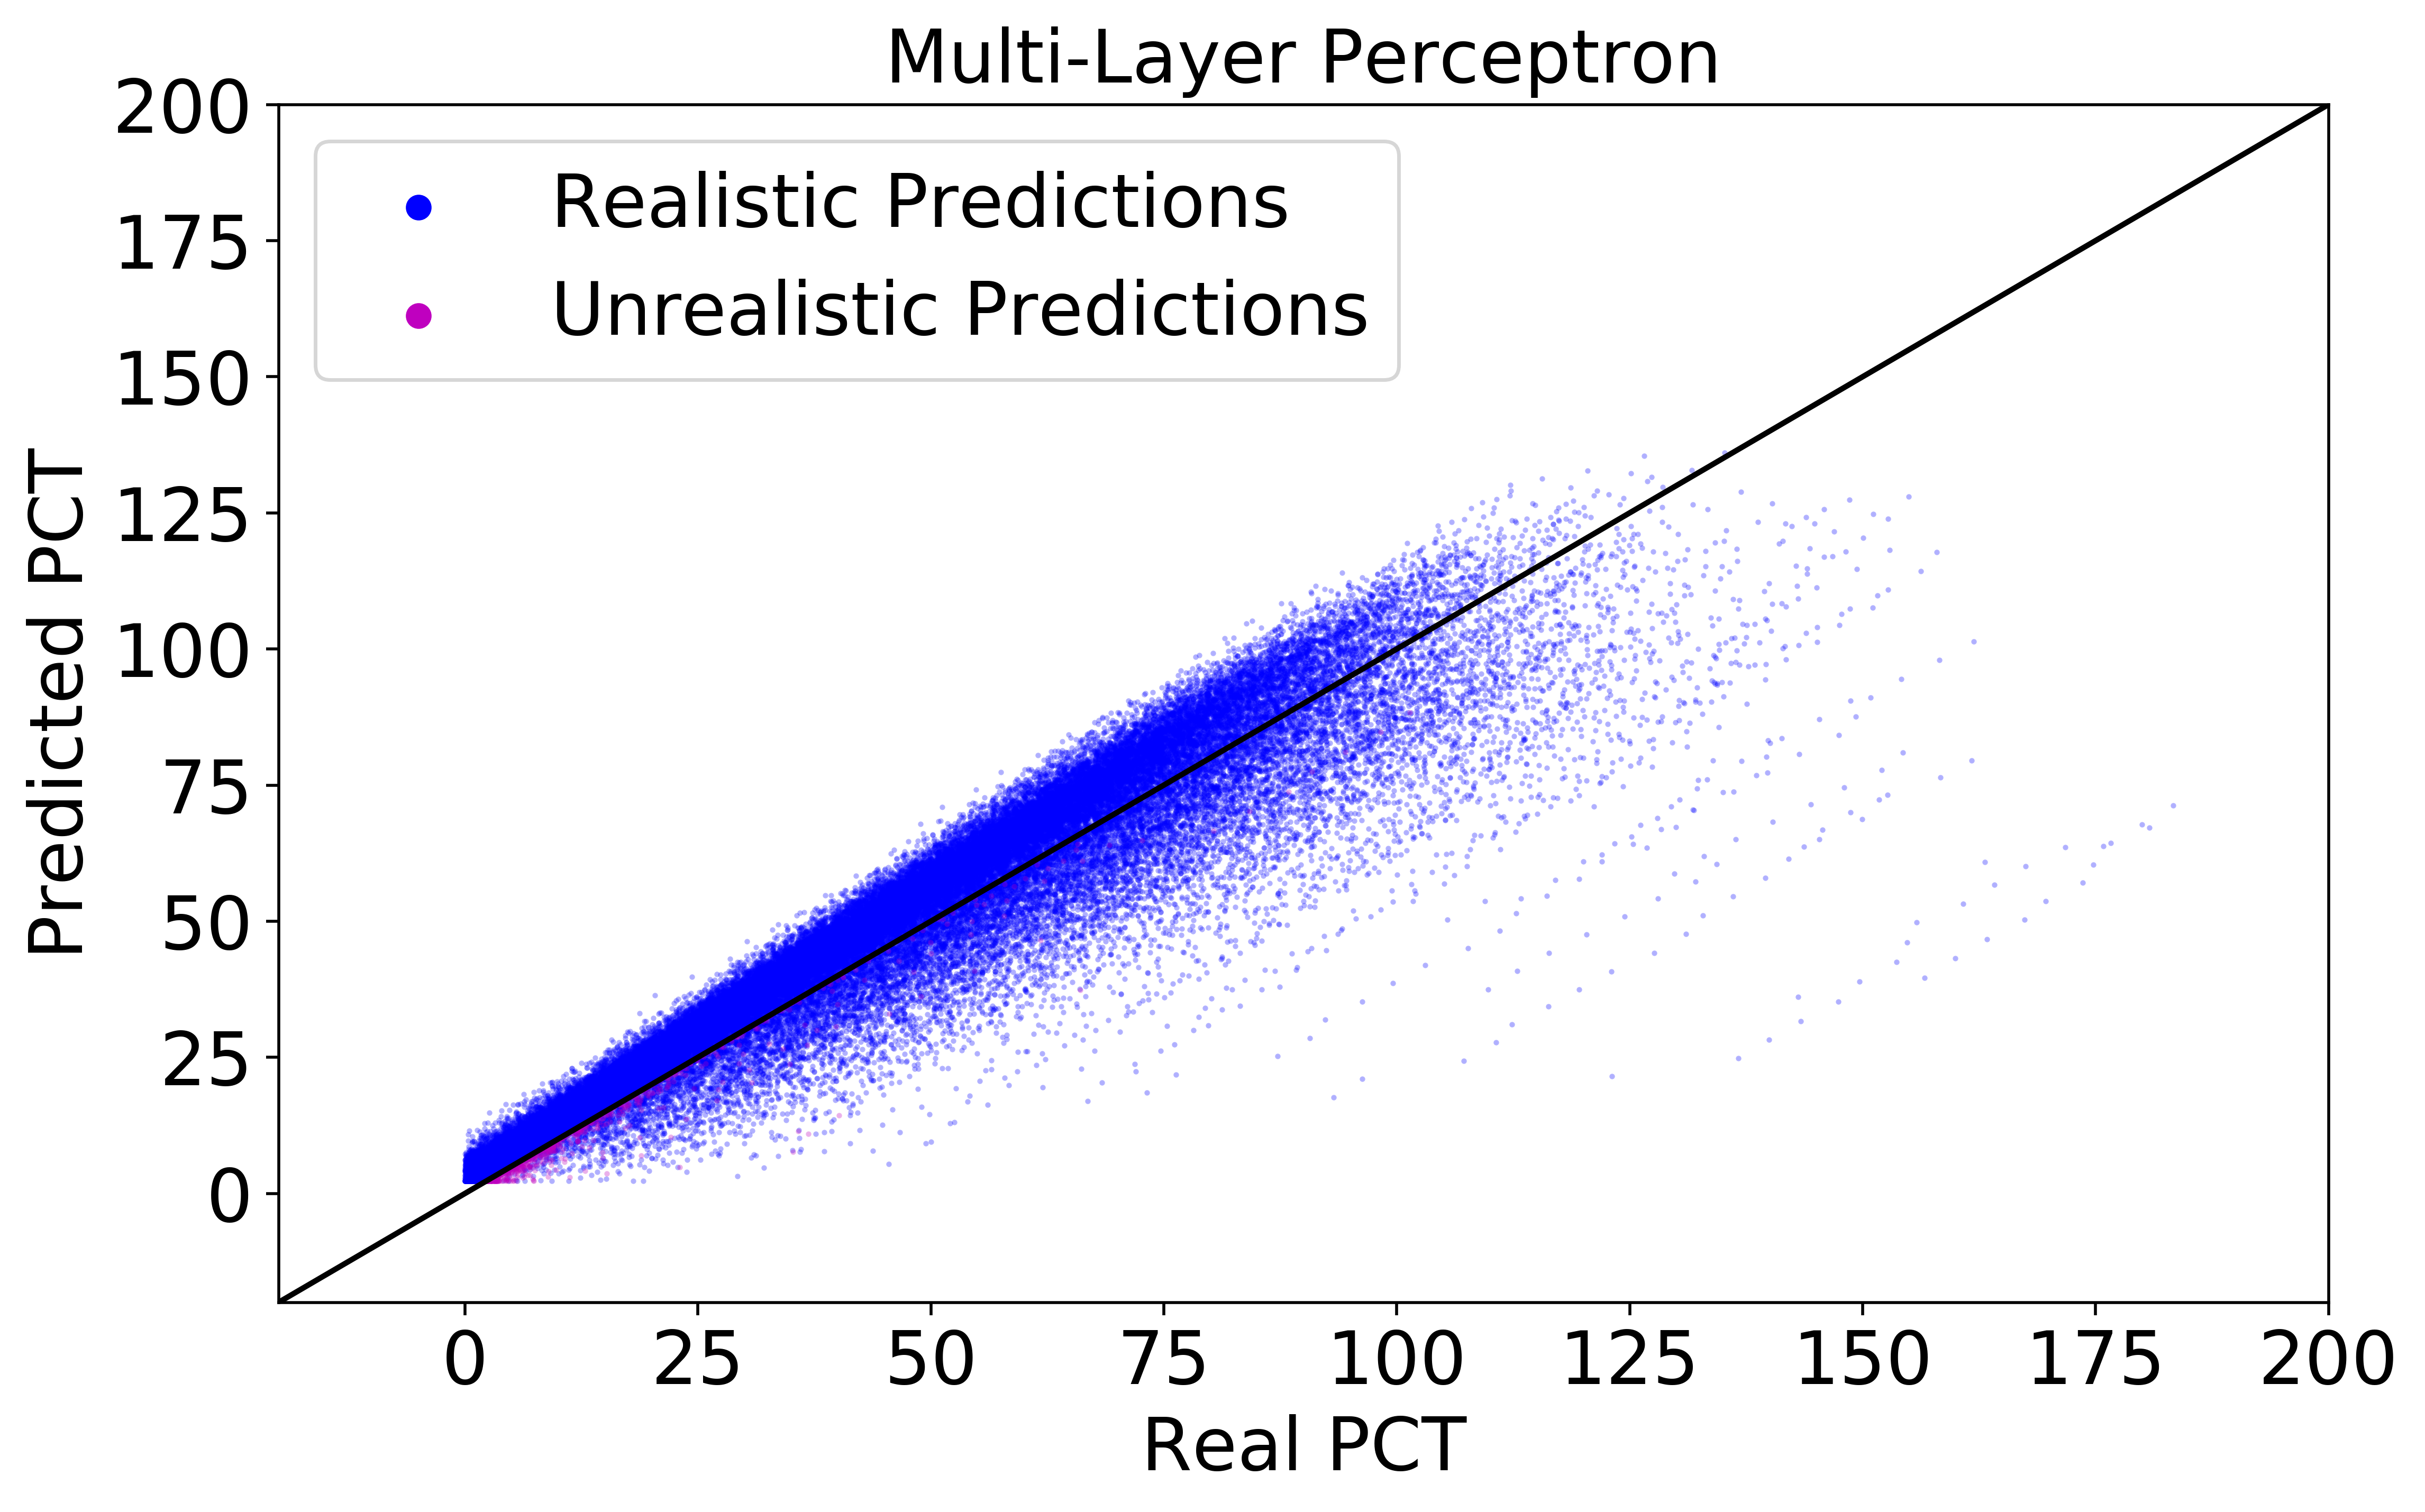

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6), dpi=500)

alpha = 0.3

ax.scatter([1000], [1000], color='blue', marker='o')
ax.scatter([1000], [1000], color='m', marker='o')
ax.legend(['Realistic Predictions', 'Unrealistic Predictions'], fontsize = 20.0)

ax.scatter(test_y_mkp[y_pred>=test_y_loc], y_pred[y_pred>=test_y_loc], marker='.', alpha=alpha, color='blue', s=1)
ax.scatter(test_y_mkp[y_pred<test_y_loc], y_pred[y_pred<test_y_loc], marker='.', alpha=alpha, color='m', s=1)


ax.plot([-20, 200], [-20, 200], color='black')
ax.set_xlim([-20, 200])
ax.set_ylim([-20, 200])

ax.set_title('Multi-Layer Perceptron', fontsize = 20.0)
ax.set_xlabel('Real PCT', fontsize = 20.0)
ax.set_ylabel('Predicted PCT', fontsize = 20.0)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

fig.savefig("mlp.png")
plt.show()